In [1]:
# prerequisite package imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Example 1

In [2]:
df = pd.read_csv('fuel_econ.csv')

In [3]:
df.columns

Index(['id', 'make', 'model', 'year', 'VClass', 'drive', 'trans', 'fuelType',
       'cylinders', 'displ', 'pv2', 'pv4', 'city', 'UCity', 'highway',
       'UHighway', 'comb', 'co2', 'feScore', 'ghgScore'],
      dtype='object')

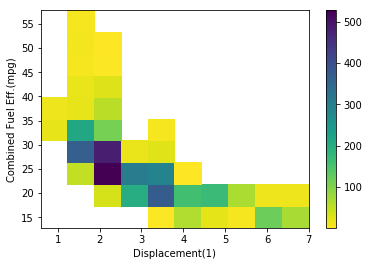

In [8]:
plt.hist2d(data=df,x='displ',y='comb',cmin=0.5,cmap='viridis_r');
# cmap = colormap (https://matplotlib.org/tutorials/colors/colormaps.html)
# cmin = All bins that has count less than cmin will not be displayed 
# cmax = All bins that has count larger than cmax will not be displayed 

plt.colorbar()  # level of color in numeric value  
plt.xlabel('Displacement(1)')
plt.ylabel('Combined Fuel Eff.(mpg)');

In [6]:
df[['displ','comb']].describe()
# we can decide proper bin range from statistic data 

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


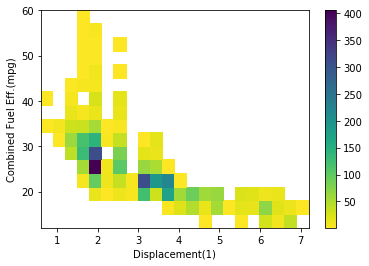

In [9]:
bin_x = np.arange(0.6,7+0.3,0.3)
bin_y = np.arange(12,58+3,3)
plt.hist2d(data=df,x='displ',y='comb',cmin=0.5,cmap='viridis_r',
          bins = [bin_x,bin_y]);  
# 0.3 and 3 are assiged to suit itself 
plt.colorbar()  # degree of color on the right side  
plt.xlabel('Displacement(1)')
plt.ylabel('Combined Fuel Eff.(mpg)');

If you want to annotate on each field or data i suggest that you use seaborn. not matplotlib.It's quite complicated

## Example 2

In [28]:
df[['displ','co2']].describe()
# we can decide proper bin range from statistic data 

,displ,co2
count,3929.000000,3929.000000
mean,2.950573,376.564266
std,1.305901,92.338892
min,0.600000,29.000000
25%,2.000000,315.000000
50%,2.500000,369.000000
75%,3.600000,429.000000
max,7.000000,692.000000


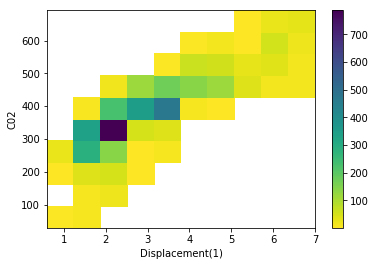

In [29]:
in_x = np.arange(0.6,7+0.3,0.3)
bin_y = np.arange(92,692+10,10)
plt.hist2d(data=df,x='displ',y='co2',cmin=0.5,cmap='viridis_r')  
# 0.3 and 3 are assiged to suit myself 

plt.colorbar()  # degree of color on the right side  
plt.xlabel('Displacement(1)')
plt.ylabel('C02')
plt.show()

## Alternative : Seaborn

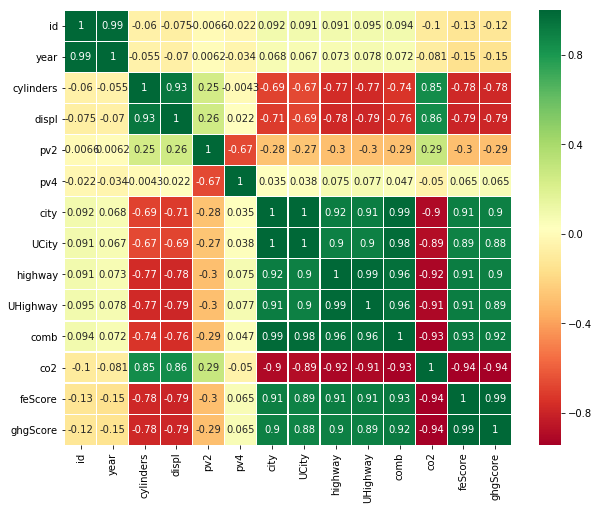

In [31]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

Seaborn use correlation of 2 variables. This is useful when you need a numeric evidence of variable pair

## Extra : Plotting pearson correlation with seaborn heatmap

In [35]:
from string import ascii_letters
sns.set(style="white") 

In [36]:
# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))  ; d.sample(2)

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
58,0.064388,-0.274329,-0.121216,-0.517645,-2.852770,0.094747,-3.166922,1.534112,-1.917208,0.143784,...,-0.463014,0.445384,-0.834493,0.195943,-0.560669,0.258057,-0.280787,-0.426789,0.068551,0.60178
60,-1.097248,-1.020079,0.191212,0.917320,-0.344325,-0.209221,0.433681,-0.723684,-2.446026,0.190466,...,-1.873846,-0.097514,1.944278,0.641516,-1.485510,-0.921264,0.884737,0.938117,-0.457549,-0.25769


In [39]:
# Compute the correlation matrix
corr = d.corr()

In [42]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
#Upper triangle of an array

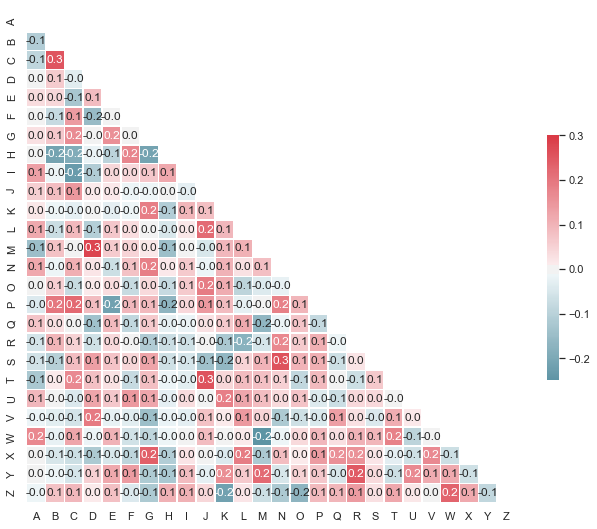

In [43]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True) # color choose
plt.figure(figsize=(11,9))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True,fmt=".1f")   
# center mean set the middle point 

In [44]:
# free dataset 
mpg = sns.load_dataset("mpg")
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [45]:
c= mpg.corr()

In [46]:
mask2 = np.triu(np.ones_like(c, dtype=np.bool)) 

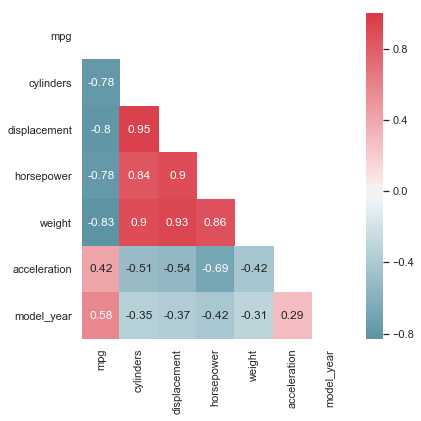

In [47]:
plt.figure(figsize=(6,6))
sns.heatmap(c,cmap=cmap,mask=mask2,center=0,annot=True)